In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

W0723 21:34:13.238719 139654826198848 deprecation.py:323] From <ipython-input-3-319879c4c296>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0723 21:34:13.240066 139654826198848 deprecation.py:323] From /home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0723 21:34:13.241559 139654826198848 deprecation.py:323] From /home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0723 21:34:13.646666 139654826198848 deprecation.py:323] From /home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0723 21:34:13.657683 139654826198848 deprecation.py:323] From /home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0723 21:34:13.732314 139654826198848 deprecation.py:323] From /home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.l

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
mnist.test.images.shape

(10000, 784)

In [19]:
single_image = mnist.train.images[10]

In [20]:
single_image = single_image.reshape(28,28)

In [12]:
import matplotlib.pyplot as plt

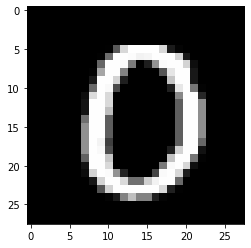

In [22]:
plt.imshow(single_image, cmap='gist_gray')

In [24]:
#PLaceholders
x = tf.placeholder(tf.float32,shape = [None, 784])


In [27]:
#Variables
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [28]:
#Create graph operations
y = tf.matmul(x,W) + b

In [29]:
#Loss Function
y_true = tf.placeholder(tf.float32, shape=[None, 10])

In [30]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y)) #loss function

W0723 22:46:42.807675 139654826198848 deprecation.py:323] From <ipython-input-30-3c5e42f2a280>:1: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [31]:
#optimizer to reduce the loss function
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train = optimizer.minimize(cross_entropy)

In [32]:
#create session
init = tf.global_variables_initializer()

In [34]:
with tf.Session() as sess:
    
    sess.run(init)
    for step in range(100):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict={x:batch_x,y_true:batch_y})
    #calculate the correct predictions
    correct_pred = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    acc = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    print(sess.run(acc, feed_dict = {x:mnist.test.images,y_true:mnist.test.labels}))

0.8903
